# Project 3: Implementing a Simple Recurrent Neural Network (RNN)

## Introduction

In this project, you will design, implement, and evaluate a simple Recurrent Neural Network (RNN) from scratch. This will involve building the entire pipeline, from data preprocessing to model training and evaluation.

## Objectives

1. Set up TensorFlow or PyTorch environments. You are free to choose your preferred DL platform.
2. Use GPU for training.
3. Create a data loader and implement data preprocessing where needed.
4. Design a Convolutional Neural Network.
5. Train and evaluate your model. Make sure to clearly show loss and accuracy values. Include visualizations too.
6. Answer assessment questions.

## Dataset

You are free to choose any dataset for this project! Kaggle would be a good source to look for datasets. Below are some examples:
- Daily Minimum Temperatures in Melbourne: This dataset contains the daily minimum temperatures in Melbourne, Australia, from 1981 to 1990.
- Daily Bitcoin Prices: This dataset contains historical daily prices of Bitcoin, which can be used for time series forecasting projects.
- Text8 Dataset: This dataset consists of the first 100 million characters from Wikipedia. It's great for text generation or language modeling tasks.
- IMDB Movie Reviews: This dataset contains 50,000 movie reviews for sentiment analysis, split evenly into 25,000 training and 25,000 test sets.
- Jena Climate Dataset: This dataset records various weather attributes (temperature, pressure, humidity, etc.) every 10 minutes, making it ideal for time series analysis.
- Earthquake Aftershocks: This dataset contains seismic data, suitable for predicting aftershocks following major earthquakes.


In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

In [19]:
# Define Vocabulary Size
VOCAB_SIZE = 20000  # Ensuring indices do not exceed this value
MAX_LEN = 250       # Maximum sequence length
BATCH_SIZE = 32

# Load IMDb dataset with a vocabulary limit
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=VOCAB_SIZE)

In [20]:
# Ensure all indices are within the allowed range
train_data = [[min(word, VOCAB_SIZE - 1) for word in review] for review in train_data]
test_data = [[min(word, VOCAB_SIZE - 1) for word in review] for review in test_data]

# Pad sequences to ensure uniform input size
train_data = pad_sequences(train_data, maxlen=MAX_LEN, padding='post', truncating='post')
test_data = pad_sequences(test_data, maxlen=MAX_LEN, padding='post', truncating='post')

# Convert labels to numpy array
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Create TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels)).shuffle(len(train_data)).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels)).batch(BATCH_SIZE)

In [21]:
# Hyperparameters
VOCAB_SIZE = 20000  # Same as used in data preprocessing
EMBEDDING_DIM = 128  # Embedding dimension
FILTERS = 128  # Number of filters for Conv1D
KERNEL_SIZE = 5  # Window size for convolution
DROPOUT_RATE = 0.5  # Dropout rate
DENSE_UNITS = 64  # Fully connected layer size

# Define CNN Model
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=250),
    Conv1D(filters=FILTERS, kernel_size=KERNEL_SIZE, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(DENSE_UNITS, activation='relu'),
    Dropout(DROPOUT_RATE),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 250, 128)          2560000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 246, 128)          82048     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 2,650,369
Trainable params: 2,650,369
Non-trainable params: 0
____________________________________________

In [22]:
# Training parameters
EPOCHS = 5
BATCH_SIZE = 32

# Train the model
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=EPOCHS
)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/5
782/782 [==============================] - 21s 27ms/step - loss: 0.4259 - accuracy: 0.7946 - val_loss: 0.2895 - val_accuracy: 0.8768
Epoch 2/5
782/782 [==============================] - 21s 27ms/step - loss: 0.1942 - accuracy: 0.9283 - val_loss: 0.2936 - val_accuracy: 0.8792
Epoch 3/5
782/782 [==============================] - 21s 27ms/step - loss: 0.0564 - accuracy: 0.9830 - val_loss: 0.3559 - val_accuracy: 0.8745
Epoch 4/5
782/782 [==============================] - 21s 27ms/step - loss: 0.0134 - accuracy: 0.9965 - val_loss: 0.5118 - val_accuracy: 0.8708
Epoch 5/5
782/782 [==============================] - 3s 4ms/step - loss: 0.5601 - accuracy: 0.8751
Test Accuracy: 0.8751


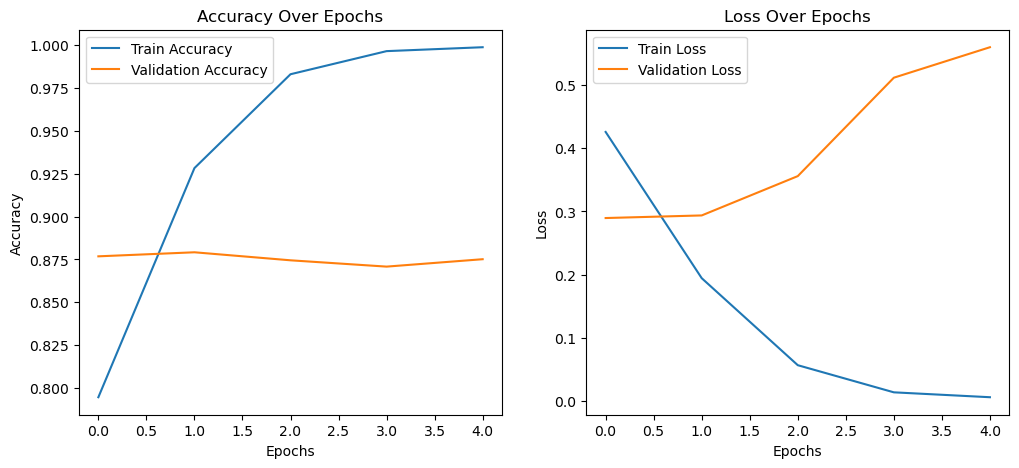

In [24]:
# Plot accuracy & loss
def plot_training(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Over Epochs')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Over Epochs')

    plt.show()

# Call the function
plot_training(history)

In [25]:
def predict_review(model, review):
    # Tokenize & preprocess input text
    encoded_review = tf.keras.datasets.imdb.get_word_index()
    words = review.lower().split()
    encoded_sequence = [encoded_review.get(word, 2) for word in words]  # 2 is <UNK> token
    padded_sequence = pad_sequences([encoded_sequence], maxlen=250, padding='post')

    # Predict sentiment
    prediction = model.predict(padded_sequence)[0][0]
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    
    return sentiment, prediction

# Example Review
sample_review = "This movie was absolutely fantastic! I loved every part of it."
sentiment, score = predict_review(model, sample_review)
print(f"Sentiment: {sentiment}, Confidence Score: {score:.4f}")

Sentiment: Negative, Confidence Score: 0.0009


---
### Questions
Answer the following questions in detail.

1. What is a Recurrent Neural Network (RNN)? Describe its key components and how they differ from those in a feedforward neural network.
2. Explain the purpose of the recurrent connection in an RNN. How does it enable the network to handle sequential data?
3. What are vanishing and exploding gradients, and how do they affect the training of RNNs?
4. Describe the Long Short-Term Memory (LSTM) network and its key components. How does it address the issues of vanishing and exploding gradients?
5. What is the purpose of the GRU (Gated Recurrent Unit) in RNNs? Compare it with LSTM.
6. Explain the role of the hidden state in an RNN. How is it updated during the training process?
7. What are some common evaluation metrics used to assess the performance of an RNN on a sequential task, such as language modeling or time series forecasting?
8. How does data preprocessing impact the performance of RNNs? Provide examples of preprocessing steps for text and time series data.
9. What is sequence-to-sequence learning in the context of RNNs, and what are its applications?
10. How can RNNs be used for anomaly detection in time series data? Describe the general approach.


Questions
Answer the following questions in detail.

1. ### What is a Recurrent Neural Network (RNN)? Describe its key components and how they differ from those in a feedforward neural network.
   A Recurrent Neural Network (RNN) is a type of artificial neural network specifically designed for sequential data. Unlike feedforward neural networks, which process inputs independently, RNNs have loops that allow information to persist across time steps, making them ideal for tasks like natural language processing, speech recognition, and time series forecasting.


   Key Components of an RNN
An RNN consists of several essential components that enable it to handle sequential data effectively:
Input Layer
Accepts input sequences, where each time step is fed into the network one by one.
Example: A sentence broken down into words (or characters) fed into the RNN over multiple time steps.

Hidden State (Memory)
The hidden state stores information from previous time steps.
It is updated at each time step using both the current input and the previous hidden state.
This allows the network to remember past information, making it effective for sequential learning.

Activation Function (Typically tanh or ReLU)
The hidden state is updated using an activation function.
Commonly used activation functions:
tanh: Helps keep values in a manageable range (-1 to 1).
ReLU: Sometimes used to prevent vanishing gradients.

Output Layer
Produces the final output of the network.
The output could be:
A single prediction for a sequence (e.g., sentiment classification).
A sequence of outputs for each time step (e.g., machine translation).

Weight Matrices
The RNN uses three key weight matrices:
Input-to-Hidden (W_xh): Processes the current input.
Hidden-to-Hidden (W_hh): Transforms the previous hidden state.
Hidden-to-Output (W_hy): Converts the hidden state to output.

Time Step Processing
The RNN processes data step-by-step, maintaining a hidden state throughout the sequence.
At each step, the network updates its hidden state based on the current input and the previous hidden state.


Differences Between Feedforward Neural Networks and Recurrent Neural Networks (RNNs)
How They Process Data
A feedforward neural network processes each input independently, without considering any previous data.
A recurrent neural network (RNN) processes data sequentially, meaning it remembers past inputs and uses that information for future predictions. This makes RNNs ideal for tasks where the order of data matters, like sentences in a paragraph or frames in a video.

Memory and Context
A feedforward network has no memory of past inputs. Each input is treated as a separate entity, with no connection to previous inputs.
An RNN maintains memory by storing information from previous steps in a hidden state, allowing it to recognize patterns and dependencies in sequences.
Network Structure

A feedforward network has a straightforward design where data flows only in one direction—from input to output—without any loops.
An RNN has loops in its structure that allow information to be passed from one step to the next, making it capable of handling sequential data.
Types of Outputs

A feedforward network typically produces a single output, like classifying an image as either a "dog" or "cat."
An RNN can produce multiple outputs, one for each step in a sequence. For example, in machine translation, it generates one word at a time while translating a sentence.
Best Use Cases

Feedforward networks work well for tasks where inputs don’t depend on each other, such as classifying images, detecting fraud in transactions, or predicting housing prices.
RNNs are best suited for sequential tasks, such as speech recognition, text generation, sentiment analysis, and stock market predictions.


2. ### Explain the purpose of the recurrent connection in an RNN. How does it enable the network to handle sequential data?
   The recurrent connection in a Recurrent Neural Network (RNN) is the key feature that allows it to handle sequential data. Unlike traditional feedforward networks, where data flows in only one direction, RNNs have a loop that feeds the output of a previous step back into the network as input for the next step. This enables the network to retain information across time steps.

How This Enables Handling of Sequential Data
The recurrent connection allows RNNs to:
Remember past information – Useful for tasks where past context matters, like understanding the meaning of a sentence.
Capture dependencies in sequences – It helps recognize patterns across time, like detecting speech patterns or predicting stock prices.
Process variable-length inputs – Unlike traditional networks that need fixed-size inputs, RNNs can handle sequences of different lengths.
Make real-time predictions – Since it processes one step at a time, RNNs can generate outputs dynamically, making them useful for live speech recognition or real-time translation.


3. ### What are vanishing and exploding gradients, and how do they affect the training of RNNs?
    Vanishing and exploding gradients are common problems that occur during the training of Recurrent Neural Networks (RNNs) due to the way gradients propagate through time. These issues arise from the repeated multiplication of gradients in backpropagation, making it difficult for RNNs to learn long-term dependencies.

1. Vanishing Gradient Problem
What is it?
The gradients shrink exponentially as they propagate backward through time.
This means that weight updates become extremely small, leading to almost no learning for earlier time steps.
How Does It Affect RNN Training?
The network forgets long-term dependencies because earlier layers receive near-zero updates.
RNNs struggle to capture long-range relationships in sequences, such as the meaning of a sentence in NLP tasks.
Training becomes slow and ineffective, often leading to poor model performance.
Why Does It Happen?
During backpropagation through time (BPTT), gradients are multiplied repeatedly by weight matrices.
If these weight values are small (less than 1), the gradients keep shrinking, eventually approaching zero.
Example Analogy
Imagine you keep multiplying a small number (like 0.1) by itself many times. The result keeps getting closer to zero (e.g., 0.1 → 0.01 → 0.001 → 0.0001), making it nearly impossible for earlier layers to learn.

2. Exploding Gradient Problem
What is it?
The gradients grow exponentially as they propagate backward through time.
This leads to extremely large weight updates, causing the model to become unstable.
How Does It Affect RNN Training?
The network experiences huge weight updates, making learning chaotic.
The loss function fluctuates wildly, preventing convergence.
The model may output random predictions and fail to generalize.
Why Does It Happen?
If the weight values are large (greater than 1), multiplying them repeatedly causes the gradient to explode.
This results in very large weight updates, causing unstable learning.
Example Analogy
Imagine you keep multiplying a large number (like 5) by itself many times. The result quickly becomes enormous (5 → 25 → 125 → 625 → 3125), making learning uncontrollable.

   
4. ### Describe the Long Short-Term Memory (LSTM) network and its key components. How does it address the issues of vanishing and exploding gradients?
    A Long Short-Term Memory (LSTM) network is a specialized type of Recurrent Neural Network (RNN) designed to handle long-term dependencies in sequential data. Unlike traditional RNNs, LSTMs effectively mitigate the vanishing gradient problem, making them better at learning from long sequences.

LSTMs achieve this by introducing gates that control the flow of information through the network, ensuring that important information is preserved and irrelevant details are forgotten.

How LSTMs Solve Vanishing & Exploding Gradient Problems
1. Preventing Vanishing Gradients
In standard RNNs, repeated multiplication of small values causes gradients to shrink exponentially.
LSTMs use the cell state Ct as a memory buffer that carries information across many time steps.Since information is added or removed via multiplication, important gradients remain large enough to learn long-range dependencies.
2. Preventing Exploding Gradients
LSTMs control weight updates using activation functions like sigmoid, which bounds values between 0 and 1.
Gradient clipping can be used additionally if needed.


5. ### What is the purpose of the GRU (Gated Recurrent Unit) in RNNs? Compare it with LSTM.
    A Gated Recurrent Unit (GRU) is an advanced type of Recurrent Neural Network (RNN) designed to solve the vanishing gradient problem while being computationally more efficient than Long Short-Term Memory (LSTM) networks.

GRUs were introduced as a simplified alternative to LSTMs, keeping many of their benefits but reducing the number of parameters by combining some of LSTM’s gates.

Comparison of LSTM and GRU in Simple Words
Number of Gates

LSTM has three gates: Forget Gate, Input Gate, and Output Gate. These gates give LSTMs precise control over what to remember and what to forget.
GRU has two gates: Reset Gate and Update Gate. It merges some functions of LSTM gates, making it simpler and more efficient.
Memory Storage

LSTM maintains a separate cell state, which acts as a dedicated long-term memory storage.
GRU does not have a separate memory cell. Instead, it stores all information in the hidden state, which means fewer computations but slightly less control over memory.
Speed and Efficiency

LSTM is more complex and takes longer to train because of its extra gate and memory cell.
GRU is faster and more computationally efficient since it has fewer parameters.
Handling Long Sequences

LSTM is better suited for very long sequences, such as analyzing long documents or remembering long-term dependencies in text or speech.
GRU works well for most sequences but may struggle with extremely long dependencies compared to LSTM.
Number of Parameters

LSTM has more parameters due to the additional gate and cell state, making it heavier to train.
GRU has fewer parameters, making it a lighter and faster alternative.
Performance Comparison

LSTM is more effective in tasks requiring precise long-term memory, like machine translation and detailed text analysis.
GRU often performs just as well as LSTM while being faster, making it a great choice for real-time applications like speech recognition.


6. ### Explain the role of the hidden state in an RNN. How is it updated during the training process?
    The hidden state in a Recurrent Neural Network (RNN) acts as the memory of the network. It allows the model to retain information from previous time steps and use it when processing the current input.Unlike feedforward networks, which process inputs independently, RNNs use the hidden state to maintain context, making them ideal for tasks involving sequential data like speech recognition, text processing, and time series prediction.

   During training, the hidden state is updated through backpropagation through time (BPTT), which adjusts the network’s weights based on the error between predicted and actual outputs.
Step-by-Step Process:
Forward Pass:
The network processes the input step by step, updating the hidden state at each step.
It generates outputs based on the current hidden state.

Loss Calculation:
The difference between the predicted and actual output is measured using a loss function (e.g., cross-entropy for classification).

Backpropagation Through Time (BPTT):
The network propagates the error backward through all previous time steps.
Gradients of the loss function are computed with respect to the weights and biases.
These gradients determine how much to adjust the weights for the next training cycle.

Gradient Descent Update:
Using an optimizer (like Adam or SGD), weights are updated to minimize the error.
The hidden state is reinitialized for the next batch (in batch training) or continues in sequential training.


8. ### What are some common evaluation metrics used to assess the performance of an RNN on a sequential task, such as language modeling or time series forecasting?
    When assessing the performance of an RNN for tasks like language modeling, time series forecasting, and sequence classification, we use specific evaluation metrics based on the task type. Below are some commonly used metrics:

   Evaluation Metrics for Language Modeling & Text Generation
Language modeling aims to predict the next word or character in a sequence. Common metrics include:

a. Perplexity (PPL)
Measures how well the model predicts a sequence.
Lower perplexity = better predictions (high confidence and accuracy).
Computed as:
𝑃𝑃𝐿=𝑒
Cross-Entropy Loss
PPL=e 
Cross-Entropy Loss
 Example: If a model has a perplexity of 10, it means it is as uncertain as randomly picking from 10 words.
 
b. Cross-Entropy Loss
Used in classification tasks, including next-word prediction.
Measures how far the predicted probability distribution is from the actual distribution.
Formula:
𝐿=−∑𝑦𝑖log(𝑦^𝑖)L=−∑y i​log(y^​i​)𝑦𝑖yi​ is the true probability.𝑦^𝑖y^​i​ is the predicted probability.

c. BLEU Score (Bilingual Evaluation Understudy)
Used in machine translation or text generation.
Compares predicted text with a reference text.
Scores range from 0 to 1, with higher scores being better.


10. ### How does data preprocessing impact the performance of RNNs? Provide examples of preprocessing steps for text and time series data.
    Data preprocessing plays a crucial role in improving the performance of RNNs by ensuring clean, structured, and optimized input data. It helps in reducing noise, handling missing values, and transforming data into a format suitable for training.

Impact of Data Preprocessing on RNN Performance:
Reduces Noise & Improves Accuracy – Cleaning data ensures better pattern recognition.
Handles Missing Values – Prevents training disruptions due to incomplete data.
Optimizes Input Representations – Tokenization and normalization improve learning efficiency.
Speeds Up Training – Reducing unnecessary features lowers computational cost.
Prevents Overfitting – Removing irrelevant data helps generalization.
Examples of Preprocessing Steps:
For Text Data (e.g., Sentiment Analysis, Machine Translation)
Tokenization – Splitting text into words or subwords.
Removing Stopwords – Eliminating common words like "the," "is," "and."
Lowercasing – Ensuring uniformity (e.g., "Movie" → "movie").
Stemming/Lemmatization – Converting words to their root form (e.g., "running" → "run").
Padding Sequences – Ensuring all sequences have the same length for batch training.
Word Embeddings – Converting words into numerical vectors (e.g., Word2Vec, GloVe).

For Time Series Data (e.g., Stock Prediction, Weather Forecasting)
Handling Missing Values – Using interpolation or forward-fill techniques.
Normalization/Standardization – Scaling data to a standard range (e.g., MinMaxScaler or Z-score normalization).
Creating Time Lags – Using past values as additional features.
Smoothing Data – Removing noise using moving averages.
Resampling – Aggregating data at consistent time intervals.


12. ### What is sequence-to-sequence learning in the context of RNNs, and what are its applications?
    Sequence-to-sequence (Seq2Seq) learning is a deep learning approach where an input sequence is transformed into an output sequence, often with different lengths. It consists of an encoder-decoder architecture, where:

The encoder RNN processes the input sequence and compresses it into a fixed-length context vector.
The decoder RNN uses this context vector to generate the output sequence step by step.
Seq2Seq learning is widely used in applications such as:

Machine Translation (e.g., translating English to French)
Text Summarization (e.g., condensing long documents into key points)
Speech-to-Text Systems (e.g., voice assistants like Siri, Google Assistant)
Chatbots and Conversational AI
Video Captioning (e.g., generating text descriptions for videos)
    
14. ### How can RNNs be used for anomaly detection in time series data? Describe the general approach.
    Recurrent Neural Networks (RNNs) can be effectively used for anomaly detection in time series data by learning temporal patterns and identifying deviations from expected behavior. The general approach involves the following steps:

Data Preprocessing

Normalize or standardize the time series data.
Structure the data into sequences (e.g., sliding windows) suitable for RNN input.
Split the dataset into training and validation sets.
Model Selection

Choose an RNN variant such as LSTM (Long Short-Term Memory) or GRU (Gated Recurrent Unit) to capture long-range dependencies.
The RNN is trained in either of these ways:
Supervised Learning (if labeled normal/anomalous data is available): The model is trained to classify sequences as normal or anomalous.
Unsupervised Learning (if only normal data is available): The model learns to predict the next time step or reconstruct sequences.
Training the RNN Model

Train the model on normal data so it learns normal temporal patterns.
In an autoencoder-based approach, an encoder-decoder RNN reconstructs normal sequences with minimal error.
In a forecasting-based approach, the model predicts future values and learns to minimize prediction errors.
Anomaly Detection

For a forecasting model, anomalies are detected when the predicted value deviates significantly from the actual observed value (based on a predefined threshold).
For an autoencoder, anomalies are detected when the reconstruction error is higher than a set threshold.
Thresholding Methods: Define a threshold using statistical methods (e.g., standard deviation of errors) or dynamic approaches like isolation forests.
Evaluation & Fine-Tuning

Evaluate the model using precision, recall, and F1-score if labeled anomalies are available.
Tune hyperparameters such as learning rate, sequence length, and model complexity.
Use Cases
Network Intrusion Detection
Fraud Detection in Finance
Fault Detection in Industrial Equipment
Medical Monitoring (e.g., ECG anomalies)

---
### Submission
Submit a link to your completed Jupyter Notebook (e.g., on GitHub (private) or Google Colab) with all the cells executed, and answers to the assessment questions included at the end of the notebook.